In [13]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [14]:
# load dataset
fifty_mel_vs_keratosis_neither_features_targets = pd.read_csv('../fifty_neither_vs_mel_keratosis_features_targets.csv')
fifty_mel_vs_keratosis_neither_features_targets.head() 

,image_id,green_iqr,blue_iqr,original_firstorder_Skewness,original_glcm_Autocorrelation,original_glcm_Imc1,original_glcm_Imc2,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_ngtdm_Complexity,original_ngtdm_Strength,melanoma,seborrheic_keratosis,neither
0,ISIC_0000001,58,40,-0.49,6.02,-0.40,0.77,4.67,0.97,0.30,2.78,0.81,0.12,0,0,1
1,ISIC_0000002,52,67,-0.31,3.99,-0.56,0.25,5.05,1.28,0.38,1.93,0.01,0.94,1,0,0
2,ISIC_0000003,57,48,-0.04,3.86,-0.38,0.43,5.16,1.41,0.43,2.21,0.12,0.08,0,0,1
3,ISIC_0000004,44,55,0.59,31.01,-0.77,0.99,4.67,0.81,0.27,4.28,3.15,2.21,1,0,0
4,ISIC_0000007,70,83,-0.75,3.93,-0.45,0.36,4.84,1.26,0.40,1.89,0.04,0.42,0,0,1


In [15]:
# diagnostic column:
## 1 - melanoma, 2 - seborrheic keratosis, 3 - neither

for i,u in enumerate(fifty_mel_vs_keratosis_neither_features_targets['image_id']):
    if fifty_mel_vs_keratosis_neither_features_targets.loc[i,'melanoma'] == 0:
        if fifty_mel_vs_keratosis_neither_features_targets.loc[i,'seborrheic_keratosis'] == 1:
            fifty_mel_vs_keratosis_neither_features_targets.loc[i,'melanoma'] = 2
    else:
        continue
        
fifty_mel_vs_keratosis_neither_features_targets.drop(columns=['seborrheic_keratosis', 'neither'], inplace=True)
fifty_mel_vs_keratosis_neither_features_targets

,image_id,green_iqr,blue_iqr,original_firstorder_Skewness,original_glcm_Autocorrelation,original_glcm_Imc1,original_glcm_Imc2,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_ngtdm_Complexity,original_ngtdm_Strength,melanoma
0,ISIC_0000001,58,40,-0.49,6.02,-0.40,0.77,4.67,0.97,0.30,2.78,0.81,0.12,0
1,ISIC_0000002,52,67,-0.31,3.99,-0.56,0.25,5.05,1.28,0.38,1.93,0.01,0.94,1
2,ISIC_0000003,57,48,-0.04,3.86,-0.38,0.43,5.16,1.41,0.43,2.21,0.12,0.08,0
3,ISIC_0000004,44,55,0.59,31.01,-0.77,0.99,4.67,0.81,0.27,4.28,3.15,2.21,1
4,ISIC_0000007,70,83,-0.75,3.93,-0.45,0.36,4.84,1.26,0.40,1.89,0.04,0.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,ISIC_0015220,47,51,0.34,6.16,-0.80,0.96,7.48,2.28,5.15,4.44,0.27,0.07,2
1310,ISIC_0015233,73,59,0.00,7.06,-0.75,0.91,5.03,0.86,0.27,3.03,0.24,0.04,2
1311,ISIC_0015260,51,34,0.55,4.31,-0.63,0.89,7.51,2.81,5.59,4.19,0.90,0.13,2
1312,ISIC_0015284,76,85,-0.06,16.20,-0.81,0.99,5.21,0.73,0.55,4.16,2.05,0.33,1


In [16]:
# separate features and target
X = fifty_mel_vs_keratosis_neither_features_targets.iloc[:,1:-2]
y = fifty_mel_vs_keratosis_neither_features_targets['melanoma']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
X_train

,green_iqr,blue_iqr,original_firstorder_Skewness,original_glcm_Autocorrelation,original_glcm_Imc1,original_glcm_Imc2,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_ngtdm_Complexity
982,26,44,-0.91,1.00,0.00,0.00,7.68,7.68,27.90,2.23,0.00
678,72,57,-0.66,8.52,-0.68,0.90,7.13,1.16,1.65,3.52,0.41
1285,22,21,-0.46,7.22,-0.77,0.91,7.88,1.44,4.65,4.13,0.22
690,50,53,-1.03,3.93,-0.32,0.24,7.47,1.91,3.20,2.55,0.01
726,22,23,-2.04,14.09,-0.43,0.74,4.65,0.35,0.12,2.74,1.07
...,...,...,...,...,...,...,...,...,...,...,...
1,52,67,-0.31,3.99,-0.56,0.25,5.05,1.28,0.38,1.93,0.01
877,27,24,-2.23,29.06,-0.79,0.94,7.23,0.69,1.05,3.77,0.91
854,24,27,0.56,17.62,-0.57,0.82,4.94,0.30,0.12,2.82,1.96
1226,31,22,1.47,8.33,-0.83,0.90,7.89,1.13,3.35,3.86,0.66


In [7]:
# Preliminary model training and evaluation with LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.46it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.54               0.55    None      0.54   
XGBClassifier                      0.58               0.55    None      0.57   
QuadraticDiscriminantAnalysis      0.56               0.54    None      0.55   
RandomForestClassifier             0.59               0.53    None      0.57   
LinearSVC                          0.61               0.53    None      0.56   
LogisticRegression                 0.60               0.53    None      0.54   
ExtraTreesClassifier               0.59               0.53    None      0.56   
LGBMClassifier                     0.56               0.52    None      0.55   
GaussianNB                         0.53               0.52    None      0.53   
SVC                                0.61               0.51    None      0.54   
AdaBoostClassifier                 0.55 

In [8]:
models.to_csv('fnmk_models.csv')

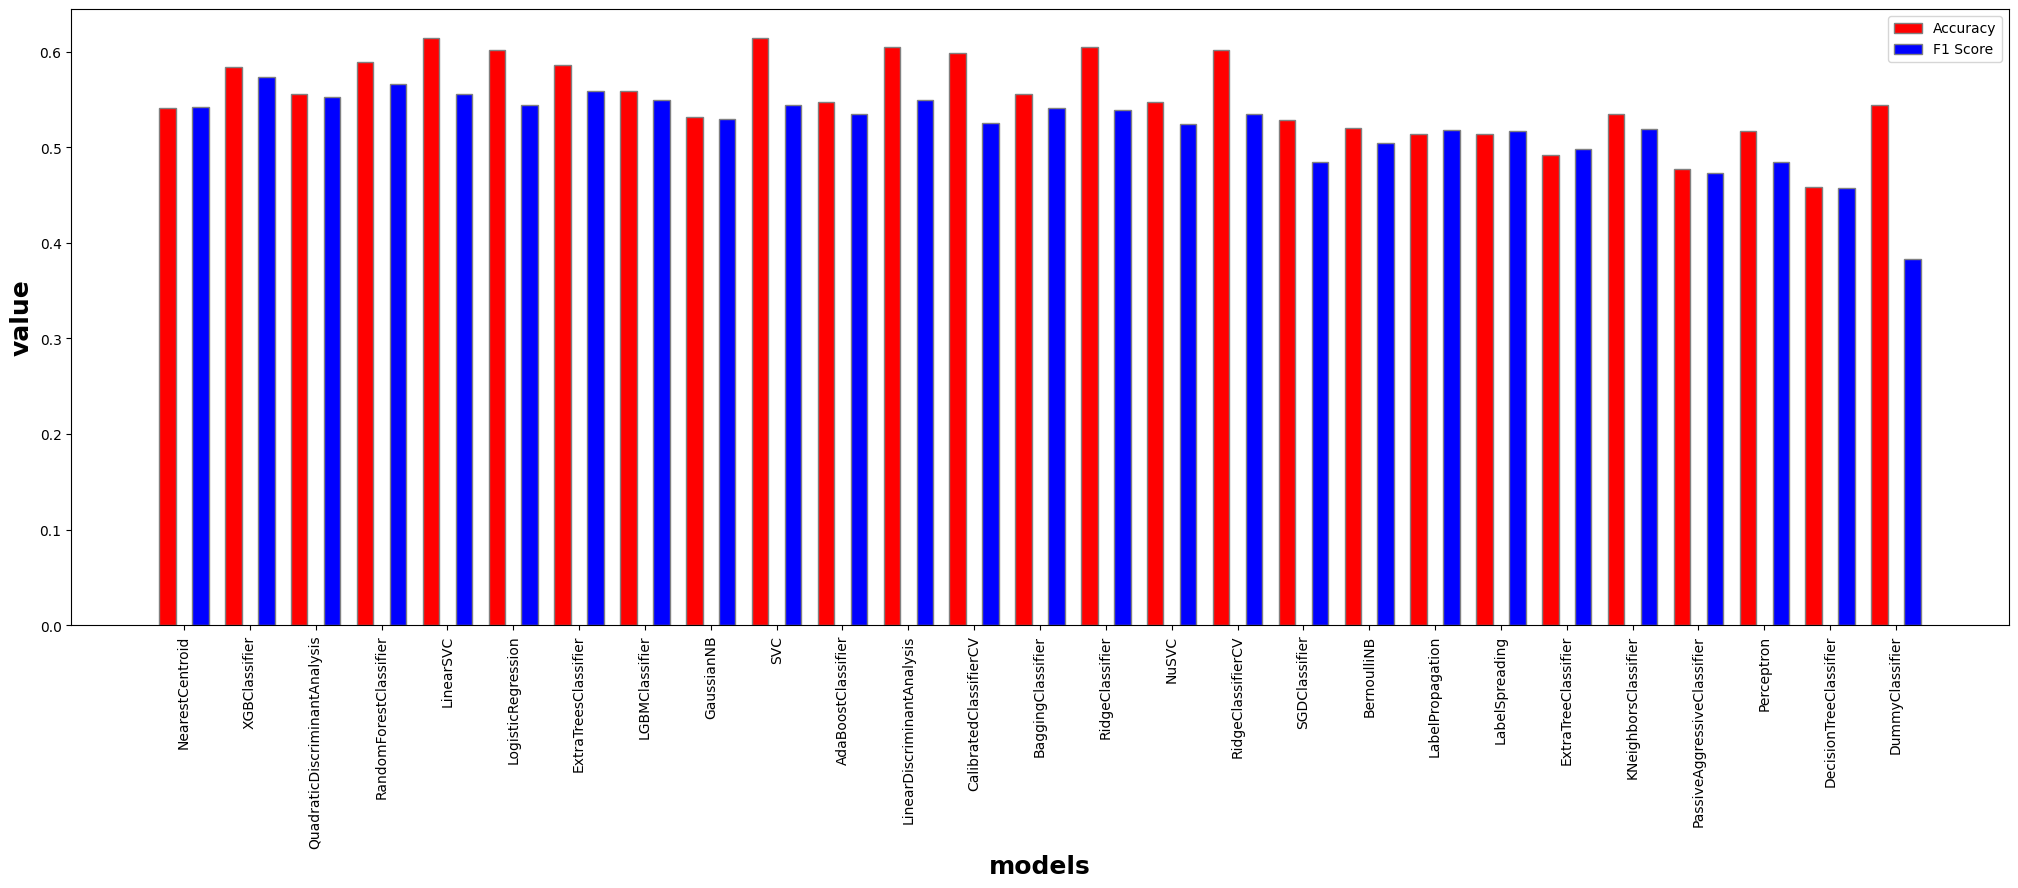

In [9]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(25, 8))


# set height of bar
acc = list(models['Accuracy'])
#auc = list(models['ROC AUC'])
f1s = list(models['F1 Score'])


# Set position of bar on Xaxis
br1 = np.arange(len(acc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


# Make the plot
plt.bar(br1, acc, color ='r', width = barWidth, edgecolor = 'grey', label ='Accuracy')
#plt.bar(br2, auc, color ='g', width = barWidth, edgecolor = 'grey', label ='auc')
plt.bar(br3, f1s, color ='b', width = barWidth, edgecolor = 'grey', label ='F1 Score')


# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 18)
plt.ylabel('value', fontweight ='bold', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(acc))], (list(models.index)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.savefig('../plots/fnmk_model_acc_f1s.png', bbox_inches='tight')
plt.show()

In [5]:
# Optimizing the RandomForest Classifier
rf_clf = RandomForestClassifier(random_state=1)

In [75]:
n_estimators = [75, 100, 200]
max_depth = [3, 4, 7, 10]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 5, 8, 20]
max_features = ['auto', 'sqrt']
bootstrap = [True, False]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf,
              bootstrap = bootstrap,
              max_features = max_features)


gridF = GridSearchCV(rf_clf, hyperF, cv = 7, verbose = 1, 
                      n_jobs = -1, refit='accuracy', return_train_score=True)

bestF = gridF.fit(X_train, y_train)

Fitting 7 folds for each of 768 candidates, totalling 5376 fits


In [76]:
print('Best score reached: {} with params: {} '.format(bestF.best_score_, bestF.best_params_))

Best score reached: 0.5827760891590679 with params: {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100} 


<AxesSubplot:>

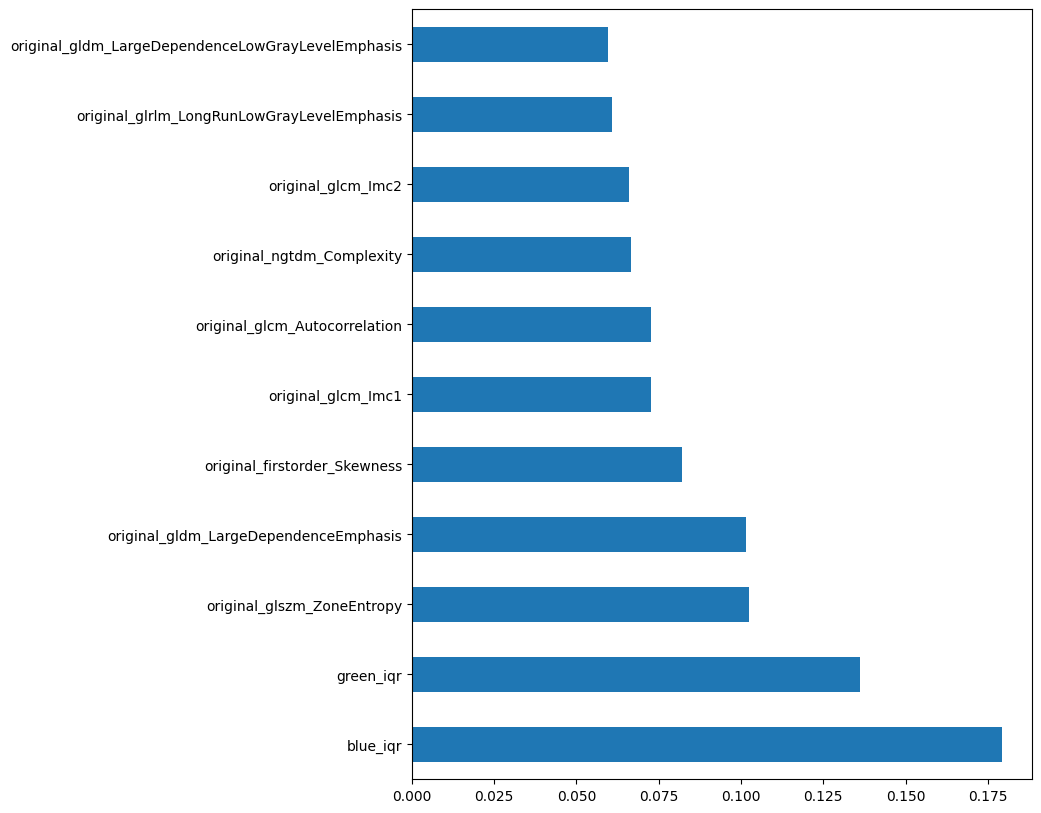

In [77]:
feat_imp = pd.Series(bestF.best_estimator_.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))

In [78]:
y_predF = bestF.predict(X_test)

In [79]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_predF)))

Model accuracy : 0.6170


In [6]:
 # Optimizing LogisticRegression

In [6]:
log_clf = LogisticRegression(random_state=1)

In [7]:
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

In [8]:
print('Best score reached: {} with params: {} '.format(result.best_score_, result.best_params_))

Best score reached: 0.5910382450458787 with params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} 


In [9]:
result.best_estimator_.coef_

array([[ 0.02775281, -0.00024302, -0.04030857, -0.0207984 ,  0.08242973,
        -0.10205436, -0.09272042,  0.08368569, -0.00070369, -0.15966483,
        -0.03213781],
       [-0.01434234,  0.01452806, -0.01779883,  0.01185725, -0.04751602,
         0.04404898, -0.16784409, -0.11273747,  0.02018993,  0.02065172,
         0.0114556 ],
       [-0.02924077, -0.05607302,  0.13480197,  0.02029479, -0.02019754,
         0.03398971,  0.21109532, -0.07026934, -0.00645467,  0.13307755,
         0.00188845]])

In [10]:
y_predF = result.predict(X_test)

In [11]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_predF)))

Model accuracy : 0.5684


In [12]:
# SVM (SVC)

In [54]:
svc=SVC(kernel='rbf', C=1000.0)

In [55]:
# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5623
